In [6]:
# Your code here


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split



1.DATA COLLECT

In [7]:
ds = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv').iloc[:,1:]
ds.to_csv('/workspaces/machine-learning-python-template/data/raw/machinelearning.csv', index=False)# he descargado y guardado el csv
ds.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


2. EXPLORATION AND DATA CLEANING

In [8]:
ds.shape 

(48895, 15)

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [10]:
ds.nunique()

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

CHECK IF IS ANY DUPLICATED 

In [11]:
print(ds.duplicated().sum())#comprobación de duplicados 

0


In [12]:
#Eliminamos columnas irrelevantes 

ds.drop(columns= ['name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'], inplace= True) 

In [13]:
ds.isnull().any(axis=0)

neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [14]:
#creamos una nueva columna 
ds['has_review'] = (ds['number_of_reviews'] > 0).astype(int) 
#Esto crea una serie booleana donde cada valor es True si number_of_reviews es mayor que 0, y False si es 0..astype(int): Convierte los valores booleanos a enteros. True se convierte en 1 y False se convierte en 0.


In [15]:
ds.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,1
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1


In [17]:
mapping = {'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2}

ds['room_type'] = ds['room_type'].map(mapping)
ds

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review
0,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,6,365,1
1,Manhattan,Midtown,40.75362,-73.98377,2,225,1,45,2,355,1
2,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,1,365,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,2,89,1,270,1,194,1
4,Manhattan,East Harlem,40.79851,-73.94399,2,80,10,9,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,1,70,2,0,2,9,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,1,40,4,0,2,36,0
48892,Manhattan,Harlem,40.81475,-73.94867,2,115,10,0,1,27,0
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,0,55,1,0,6,2,0


In [18]:
ds.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review
0,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,6,365,1
1,Manhattan,Midtown,40.75362,-73.98377,2,225,1,45,2,355,1
2,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,1,365,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,2,89,1,270,1,194,1
4,Manhattan,East Harlem,40.79851,-73.94399,2,80,10,9,1,0,1


In [19]:
#Creamos una nueva columna 
ds['room_type_str'] = ds['room_type'].astype(str)
ds['neighbourhood_room_type'] = ds['neighbourhood'] + '_' + (ds['room_type_str'])
ds

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review,room_type_str,neighbourhood_room_type
0,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,6,365,1,1,Kensington_1
1,Manhattan,Midtown,40.75362,-73.98377,2,225,1,45,2,355,1,2,Midtown_2
2,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,1,365,0,1,Harlem_1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,2,89,1,270,1,194,1,2,Clinton Hill_2
4,Manhattan,East Harlem,40.79851,-73.94399,2,80,10,9,1,0,1,2,East Harlem_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,1,70,2,0,2,9,0,1,Bedford-Stuyvesant_1
48891,Brooklyn,Bushwick,40.70184,-73.93317,1,40,4,0,2,36,0,1,Bushwick_1
48892,Manhattan,Harlem,40.81475,-73.94867,2,115,10,0,1,27,0,2,Harlem_2
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,0,55,1,0,6,2,0,0,Hell's Kitchen_0


In [20]:
ds.loc[ds['neighbourhood'] == 'Kensington']

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review,room_type_str,neighbourhood_room_type
0,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,6,365,1,1,Kensington_1
258,Brooklyn,Kensington,40.64106,-73.97426,1,39,1,45,2,365,1,1,Kensington_1
397,Brooklyn,Kensington,40.64302,-73.97255,1,39,1,82,2,365,1,1,Kensington_1
738,Brooklyn,Kensington,40.64277,-73.97296,1,60,2,20,1,347,1,1,Kensington_1
786,Brooklyn,Kensington,40.64330,-73.97386,2,90,30,3,1,286,1,2,Kensington_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47286,Brooklyn,Kensington,40.64264,-73.97855,1,67,1,0,1,31,0,1,Kensington_1
47295,Brooklyn,Kensington,40.64353,-73.98450,2,100,1,1,1,96,1,2,Kensington_2
47512,Brooklyn,Kensington,40.63293,-73.97117,1,86,2,0,1,365,0,1,Kensington_1
47963,Brooklyn,Kensington,40.64126,-73.97797,2,169,1,2,1,53,1,2,Kensington_2


In [21]:

avg_prices = ds.groupby('neighbourhood_room_type')['price'].mean()

In [22]:
ds['neighbourhood_encoding'] = ds['neighbourhood_room_type'].map(avg_prices)


In [23]:
ds.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review,room_type_str,neighbourhood_room_type,neighbourhood_encoding
0,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,6,365,1,1,Kensington_1,59.377551
1,Manhattan,Midtown,40.75362,-73.98377,2,225,1,45,2,355,1,2,Midtown_2,301.268182
2,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,1,365,0,1,Harlem_1,81.950413
3,Brooklyn,Clinton Hill,40.68514,-73.95976,2,89,1,270,1,194,1,2,Clinton Hill_2,243.982659
4,Manhattan,East Harlem,40.79851,-73.94399,2,80,10,9,1,0,1,2,East Harlem_2,189.545267


In [24]:
ds[ds['price'] == 0]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review,room_type_str,neighbourhood_room_type,neighbourhood_encoding
23161,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,1,0,4,1,4,28,1,1,Bedford-Stuyvesant_1,73.296860
25433,Bronx,East Morrisania,40.83296,-73.88668,1,0,2,55,4,127,1,1,East Morrisania_1,67.142857
25634,Brooklyn,Bushwick,40.69467,-73.92433,1,0,2,16,5,0,1,1,Bushwick_1,62.623037
25753,Brooklyn,Greenpoint,40.72462,-73.94072,1,0,2,12,2,0,1,1,Greenpoint_1,88.462185
25778,Brooklyn,Williamsburg,40.70838,-73.94645,2,0,5,3,1,73,1,2,Williamsburg_2,206.094130
25794,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,1,0,1,93,6,176,1,1,Bedford-Stuyvesant_1,73.296860
25795,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,1,0,1,95,6,232,1,1,Bedford-Stuyvesant_1,73.296860
25796,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,1,0,1,95,6,222,1,1,Bedford-Stuyvesant_1,73.296860
26259,Manhattan,Murray Hill,40.75091,-73.97597,2,0,3,0,1,0,0,2,Murray Hill_2,237.852130
26841,Brooklyn,Bushwick,40.69211,-73.90670,0,0,30,2,6,333,1,0,Bushwick_0,37.382353


In [25]:
#comprobamos los datos con precio = 0 ya que no nos aportan ningun valor 
indices_a_eliminar = ds[ds['price'] == 0].index

#eliminamos filas 
ds = ds.drop(indices_a_eliminar)

ds


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review,room_type_str,neighbourhood_room_type,neighbourhood_encoding
0,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,6,365,1,1,Kensington_1,59.377551
1,Manhattan,Midtown,40.75362,-73.98377,2,225,1,45,2,355,1,2,Midtown_2,301.268182
2,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,1,365,0,1,Harlem_1,81.950413
3,Brooklyn,Clinton Hill,40.68514,-73.95976,2,89,1,270,1,194,1,2,Clinton Hill_2,243.982659
4,Manhattan,East Harlem,40.79851,-73.94399,2,80,10,9,1,0,1,2,East Harlem_2,189.545267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,1,70,2,0,2,9,0,1,Bedford-Stuyvesant_1,73.296860
48891,Brooklyn,Bushwick,40.70184,-73.93317,1,40,4,0,2,36,0,1,Bushwick_1,62.623037
48892,Manhattan,Harlem,40.81475,-73.94867,2,115,10,0,1,27,0,2,Harlem_2,177.595560
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,0,55,1,0,6,2,0,0,Hell's Kitchen_0,95.838384


In [26]:
label_encoder = LabelEncoder()

#Aplico el encoder a la columna que a cada valor le aplica un valor numérico
ds["neighbourhood"] = label_encoder.fit_transform(ds["neighbourhood"])
ds

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review,room_type_str,neighbourhood_room_type,neighbourhood_encoding
0,Brooklyn,108,40.64749,-73.97237,1,149,1,9,6,365,1,1,Kensington_1,59.377551
1,Manhattan,127,40.75362,-73.98377,2,225,1,45,2,355,1,2,Midtown_2,301.268182
2,Manhattan,94,40.80902,-73.94190,1,150,3,0,1,365,0,1,Harlem_1,81.950413
3,Brooklyn,41,40.68514,-73.95976,2,89,1,270,1,194,1,2,Clinton Hill_2,243.982659
4,Manhattan,61,40.79851,-73.94399,2,80,10,9,1,0,1,2,East Harlem_2,189.545267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,13,40.67853,-73.94995,1,70,2,0,2,9,0,1,Bedford-Stuyvesant_1,73.296860
48891,Brooklyn,28,40.70184,-73.93317,1,40,4,0,2,36,0,1,Bushwick_1,62.623037
48892,Manhattan,94,40.81475,-73.94867,2,115,10,0,1,27,0,2,Harlem_2,177.595560
48893,Manhattan,95,40.75751,-73.99112,0,55,1,0,6,2,0,0,Hell's Kitchen_0,95.838384


In [27]:
frecuencia = ds.value_counts('neighbourhood')
ds['neighbourhood_frecuency'] = ds['neighbourhood'].map(frecuencia)
ds

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review,room_type_str,neighbourhood_room_type,neighbourhood_encoding,neighbourhood_frecuency
0,Brooklyn,108,40.64749,-73.97237,1,149,1,9,6,365,1,1,Kensington_1,59.377551,175
1,Manhattan,127,40.75362,-73.98377,2,225,1,45,2,355,1,2,Midtown_2,301.268182,1545
2,Manhattan,94,40.80902,-73.94190,1,150,3,0,1,365,0,1,Harlem_1,81.950413,2658
3,Brooklyn,41,40.68514,-73.95976,2,89,1,270,1,194,1,2,Clinton Hill_2,243.982659,572
4,Manhattan,61,40.79851,-73.94399,2,80,10,9,1,0,1,2,East Harlem_2,189.545267,1117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,13,40.67853,-73.94995,1,70,2,0,2,9,0,1,Bedford-Stuyvesant_1,73.296860,3710
48891,Brooklyn,28,40.70184,-73.93317,1,40,4,0,2,36,0,1,Bushwick_1,62.623037,2462
48892,Manhattan,94,40.81475,-73.94867,2,115,10,0,1,27,0,2,Harlem_2,177.595560,2658
48893,Manhattan,95,40.75751,-73.99112,0,55,1,0,6,2,0,0,Hell's Kitchen_0,95.838384,1958


In [28]:
ds.isnull().mean()*100 # Incidencia de los valores perdidos en cada una de las variables

neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
has_review                        0.0
room_type_str                     0.0
neighbourhood_room_type           0.0
neighbourhood_encoding            0.0
neighbourhood_frecuency           0.0
dtype: float64

3. ANALISYS OF univariate variable

Categorical-categorical analysis

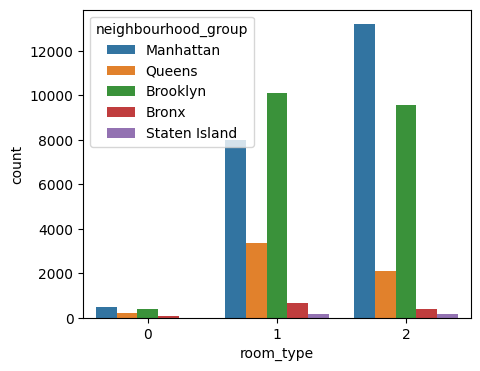

In [29]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = ds, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

Numerical-categorical analysis (complete)

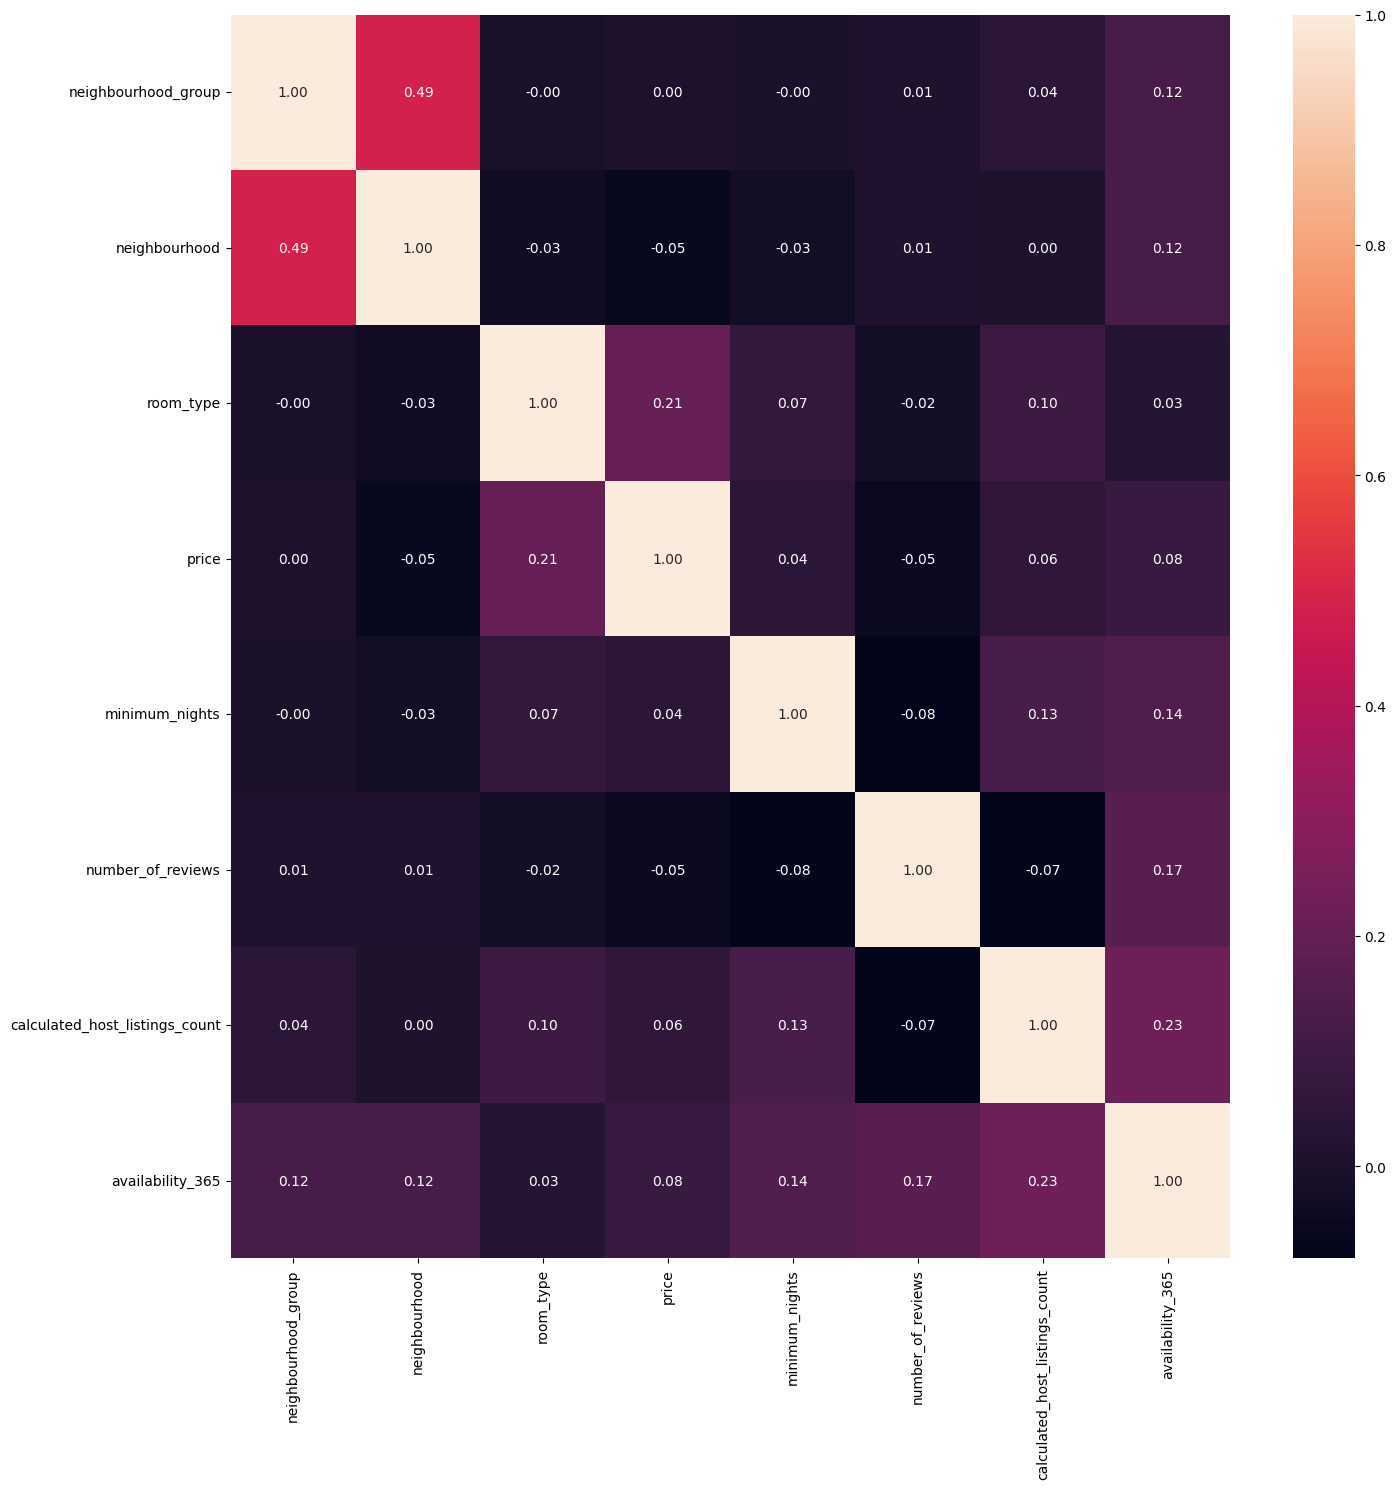

In [30]:
# Factorize the Room Type and Neighborhood Data
ds["room_type"] = pd.factorize(ds["room_type"])[0]
ds["neighbourhood_group"] = pd.factorize(ds["neighbourhood_group"])[0]
ds["neighbourhood"] = pd.factorize(ds["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(ds[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

In [31]:
ds.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,48884.0,0.787,0.844,0.000,0.000,1.000,1.000,4.000
neighbourhood,48884.0,29.890,34.674,0.000,8.000,19.000,37.000,220.000
latitude,48884.0,40.729,0.055,40.500,40.690,40.723,40.763,40.913
longitude,48884.0,-73.952,0.046,-74.244,-73.983,-73.956,-73.936,-73.713
room_type,48884.0,0.567,0.541,0.000,0.000,1.000,1.000,2.000
price,48884.0,152.755,240.170,10.000,69.000,106.000,175.000,10000.000
minimum_nights,48884.0,7.030,20.512,1.000,1.000,3.000,5.000,1250.000
number_of_reviews,48884.0,23.272,44.551,0.000,1.000,5.000,24.000,629.000
calculated_host_listings_count,48884.0,7.145,32.956,1.000,1.000,1.000,2.000,327.000
availability_365,48884.0,112.779,131.627,0.000,0.000,45.000,227.000,365.000


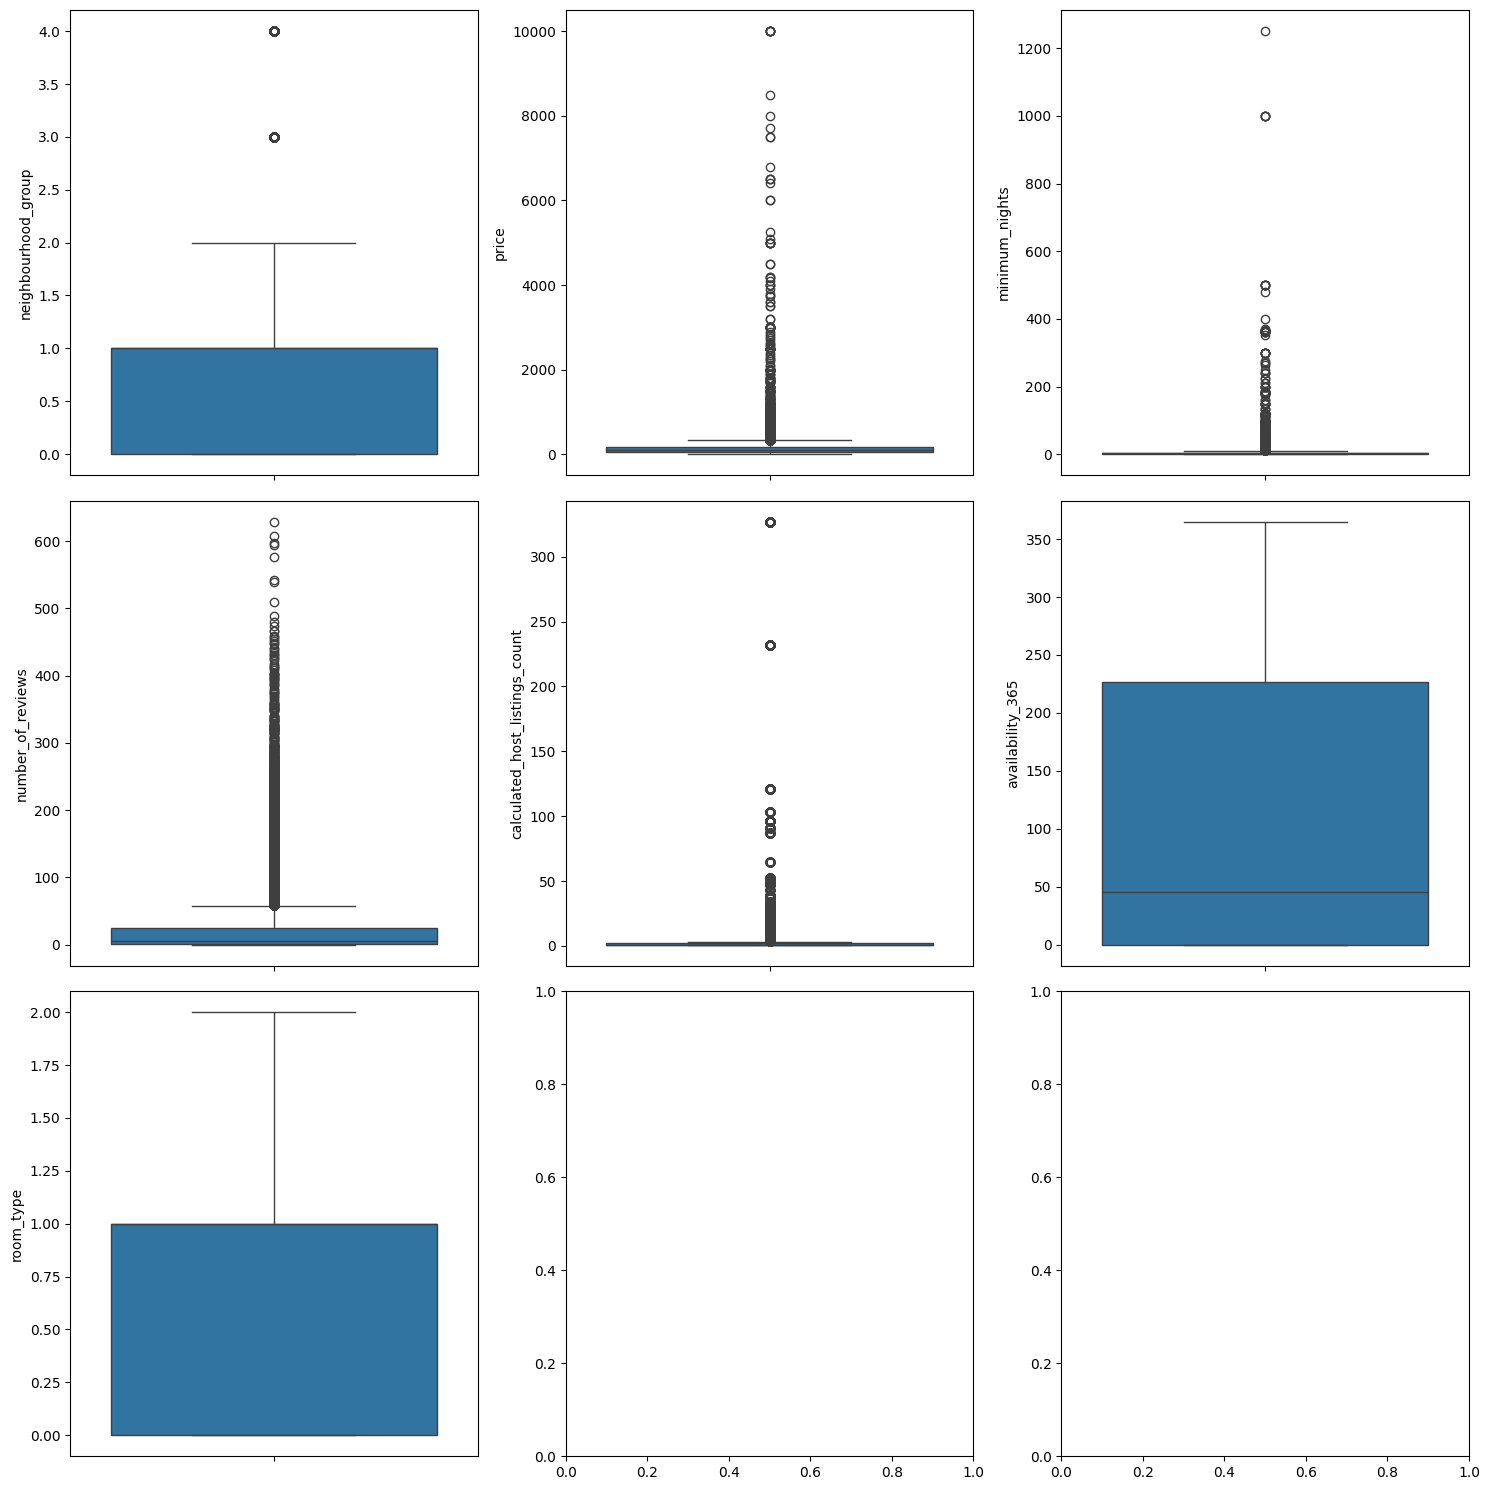

In [32]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = ds, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = ds, y = "price")
sns.boxplot(ax = axes[0, 2], data = ds, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = ds, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = ds, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = ds, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = ds, y = "room_type")

plt.tight_layout()

plt.show()

In [37]:
ds_per_price = ds.sort_values(by='price', ascending= False)
ds_per_price 

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review,room_type_str,neighbourhood_room_type,neighbourhood_encoding,neighbourhood_frecuency
9151,2,56,40.76810,-73.91651,0,10000,100,2,1,0,1,1,Astoria_1,96.178138,900
17692,0,20,40.73260,-73.95739,1,10000,5,5,1,0,1,2,Greenpoint_2,190.115756,1114
29238,1,8,40.77213,-73.98665,1,10000,30,0,1,83,0,2,Upper West Side_2,262.045382,1971
12342,1,23,40.71355,-73.98507,0,9999,99,6,1,83,1,1,Lower East Side_1,134.054496,911
40433,1,23,40.71980,-73.98566,1,9999,30,0,1,365,0,2,Lower East Side_2,234.397233,911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33505,0,12,40.70959,-73.95693,0,10,1,0,1,83,0,1,Williamsburg_1,85.761142,3919
27972,0,20,40.72421,-73.95364,1,10,1,93,1,32,1,2,Greenpoint_2,190.115756,1114
31066,1,8,40.76844,-73.98333,0,10,1,2,1,0,1,1,Upper West Side_1,122.640000,1971
24100,1,7,40.75812,-73.98935,2,10,1,2,1,0,1,0,Hell's Kitchen_0,95.838384,1958


In [34]:

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(ds[num_variables])
ds_scal = pd.DataFrame(scal_features, index = ds.index, columns = num_variables)
ds_scal["price"] = ds["price"]
ds_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.014308,0.000000,0.015337,1.000000,0.00,0.0,149
1,0.071542,0.000000,0.003067,0.972603,0.25,0.5,225
2,0.000000,0.001601,0.000000,1.000000,0.25,0.0,150
3,0.429253,0.000000,0.000000,0.531507,0.00,0.5,89
4,0.014308,0.007206,0.000000,0.000000,0.25,0.5,80


In [35]:
X = ds_scal.drop("price", axis = 1)
y = ds_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,number_of_reviews,calculated_host_listings_count,availability_365,room_type
0,0.009539,0.000000,0.101370,0.5
1,0.007949,0.000000,0.000000,0.0
2,0.011129,0.000000,0.191781,0.0
3,0.001590,0.000000,0.000000,0.0
4,0.000000,0.009202,0.000000,0.0


In [36]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)